<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Final_Res__RF_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [12]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [14]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [16]:

set(list(dataset[target]))

{0, 1}

In [17]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [18]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

 14%|█▍        | 1/7 [06:56<41:38, 416.35s/it]

400/700 round completed......................... Accurecy: 0.9245791245791246


 29%|██▊       | 2/7 [14:45<37:16, 447.28s/it]

450/700 round completed......................... Accurecy: 0.9246913580246914


 43%|████▎     | 3/7 [23:25<32:02, 480.51s/it]

500/700 round completed......................... Accurecy: 0.9246913580246914


 57%|█████▋    | 4/7 [32:59<25:52, 517.54s/it]

550/700 round completed......................... Accurecy: 0.9244107744107745


 71%|███████▏  | 5/7 [43:26<18:33, 556.90s/it]

600/700 round completed......................... Accurecy: 0.9244107744107745


 86%|████████▌ | 6/7 [54:42<09:57, 597.52s/it]

650/700 round completed......................... Accurecy: 0.9245230078563412


100%|██████████| 7/7 [1:06:55<00:00, 573.58s/it]

700/700 round completed......................... Accurecy: 0.9237934904601571
The best n_estimators:
450


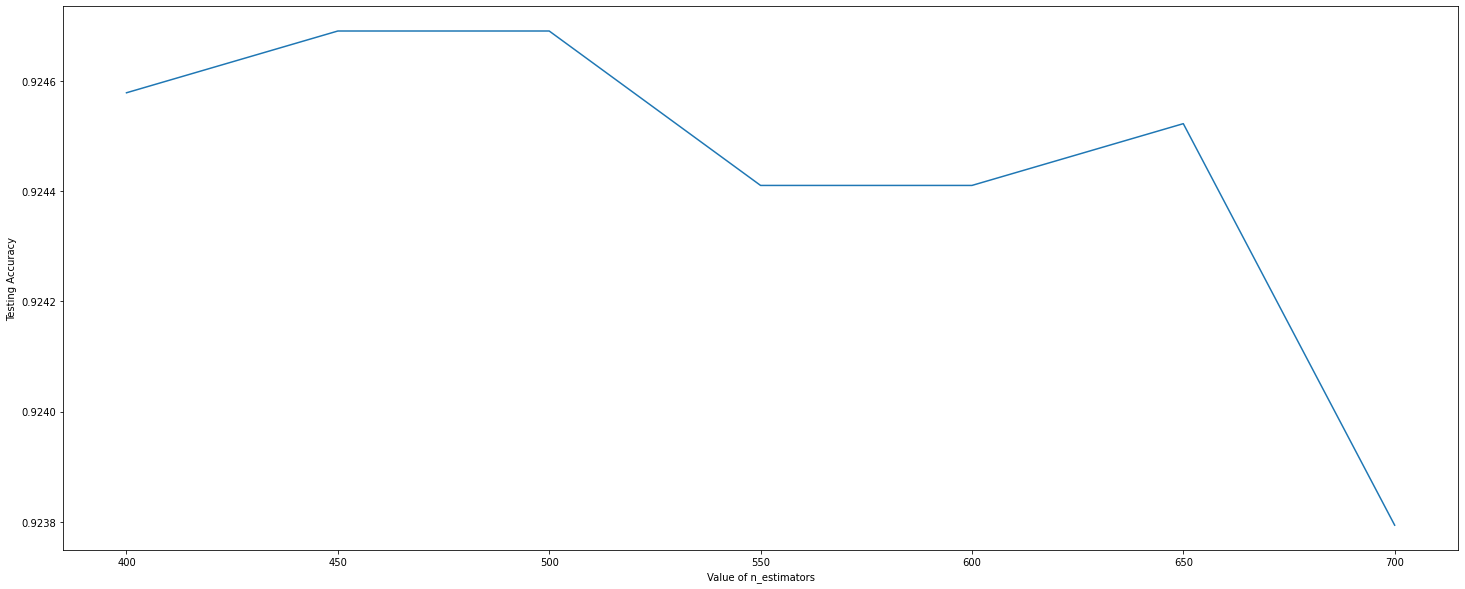

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=700
k_range = range (400,N+1,50)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  8%|▊         | 1/13 [01:44<20:50, 104.23s/it]

28/40 round completed......................... Accurecy: 0.9225028058361392


 15%|█▌        | 2/13 [03:28<19:06, 104.24s/it]

29/40 round completed......................... Accurecy: 0.9234567901234568


 23%|██▎       | 3/13 [05:13<17:26, 104.65s/it]

30/40 round completed......................... Accurecy: 0.922334455667789


 31%|███       | 4/13 [06:59<15:44, 104.99s/it]

31/40 round completed......................... Accurecy: 0.921604938271605


 38%|███▊      | 5/13 [08:44<14:01, 105.25s/it]

32/40 round completed......................... Accurecy: 0.9248597081930415


 46%|████▌     | 6/13 [10:30<12:18, 105.47s/it]

33/40 round completed......................... Accurecy: 0.9234567901234568


 54%|█████▍    | 7/13 [12:16<10:34, 105.68s/it]

34/40 round completed......................... Accurecy: 0.9234567901234568


 62%|██████▏   | 8/13 [14:02<08:49, 105.83s/it]

35/40 round completed......................... Accurecy: 0.9234006734006734


 69%|██████▉   | 9/13 [15:49<07:03, 105.91s/it]

36/40 round completed......................... Accurecy: 0.9237373737373737


 77%|███████▋  | 10/13 [17:37<05:19, 106.62s/it]

37/40 round completed......................... Accurecy: 0.9234567901234568


 85%|████████▍ | 11/13 [19:22<03:32, 106.31s/it]

38/40 round completed......................... Accurecy: 0.9235690235690236


 92%|█████████▏| 12/13 [21:08<01:46, 106.17s/it]

39/40 round completed......................... Accurecy: 0.9252525252525252


100%|██████████| 13/13 [22:54<00:00, 105.75s/it]

40/40 round completed......................... Accurecy: 0.9228956228956229
The best Depth:
39


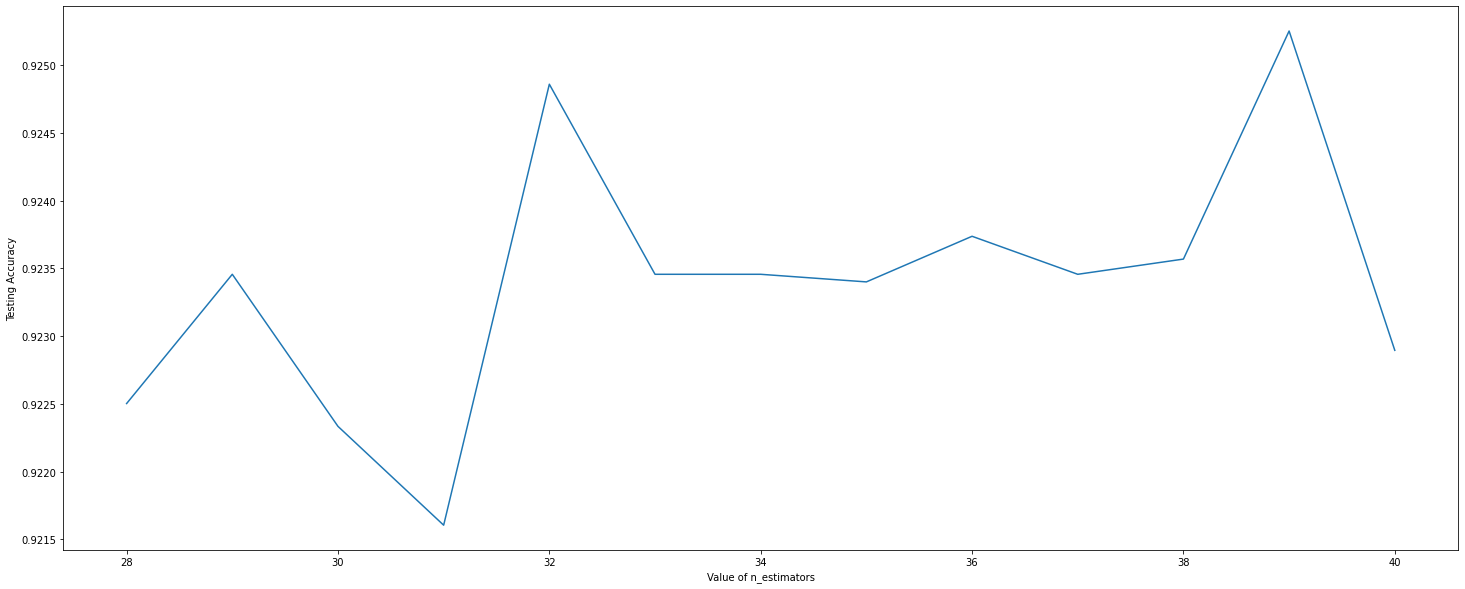

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=40
k_range = range (28,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[13654   806]
 [  536  2824]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14460
           1       0.78      0.84      0.81      3360

    accuracy                           0.92     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.92      0.93     17820

Accurecy:  0.9246913580246914


In [23]:
'''from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred));'''

#Accurecy:  0.8634854771784233

'from sklearn.ensemble import RandomForestClassifier\nrf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)\nrf_depth.fit(X_train, y_train)\ny_pred=rf_depth.predict(X_test)\n\n\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test,y_pred))\nprint("Accurecy: ",accuracy_score(y_test, y_pred));'

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=450,max_depth=39,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[13656   804]
 [  532  2828]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14460
           1       0.78      0.84      0.81      3360

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9250280583613917
